In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("out.csv")
df.head()

,pos,neg,ori,text,label,split
0,3.467241,3.717818,4.013824,dr. goldberg offers everything i look for in a...,4,train
1,3.387104,3.205972,3.632340,"Unfortunately, the frustration of being Dr. Go...",1,train
2,3.476662,3.660482,3.902763,Been going to Dr. Goldberg for over 10 years. ...,3,train
3,3.588233,3.610832,4.412211,Got a letter in the mail last week that said D...,3,train
4,3.701879,3.377970,3.960679,I don't know what Dr. Goldberg was like before...,0,train


/tmp/ipykernel_3909990/243154560.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(_df.neg, _df.pos, c=cmap(label), label=label, s=1)


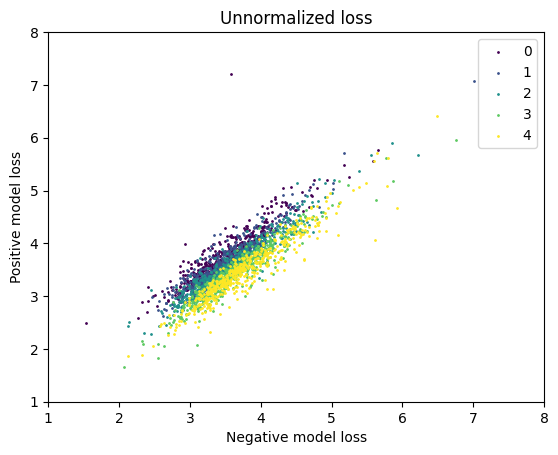

In [4]:
cmap = plt.get_cmap('viridis', 5)
for label in range(5):
    _df = df[(df.label == label) & (df["split"] == "test")].sample(500)
    plt.scatter(_df.neg, _df.pos, c=cmap(label), label=label, s=1)
plt.xlabel("Negative model loss")
plt.ylabel("Positive model loss")
plt.title("Unnormalized loss")
plt.xlim(1, 8)
plt.ylim(1, 8)
plt.legend()

/tmp/ipykernel_3909990/2339763693.py:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.exp(_df.neg - _df.ori), np.exp(_df.pos - _df.ori), c=cmap(label), label=label, s=1)


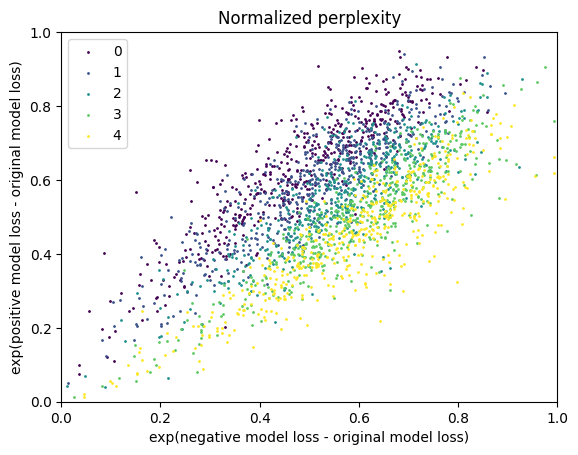

In [5]:
cmap = plt.get_cmap('viridis', 5)
for label in range(5):
    _df = df[(df.label == label) & (df["split"] == "test")].sample(500)
    plt.scatter(np.exp(_df.neg - _df.ori), np.exp(_df.pos - _df.ori), c=cmap(label), label=label, s=1)
plt.xlabel("exp(negative model loss - original model loss)")
plt.ylabel("exp(positive model loss - original model loss)")
plt.title("Normalized perplexity")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

In [6]:
df_aug = pd.read_csv("out_aug.csv")
df_aug.head()

,pos,neg,ori,text,label,split
0,3.461186,3.545303,3.812758,Took my husband here before our show at the Ve...,2,concat
1,3.919583,4.144188,4.768034,"Moi qui n'est pas difficile, jamais j'aurai cr...",2,concat
2,3.731518,3.416451,4.452436,TERRIBLE PLACE!! HORRIBLE FOOD!!! Bell Rd & 23...,2,concat
3,4.055510,4.061717,4.487148,So dissapointing! I ordered the club that clai...,2,concat
4,3.593462,3.574611,3.924789,It doesn't help that the evening ended with me...,2,concat


/tmp/ipykernel_3909990/1085763287.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.exp(_df.neg - _df.ori), np.exp(_df.pos - _df.ori), c=cmap(label), label=label, s=1)


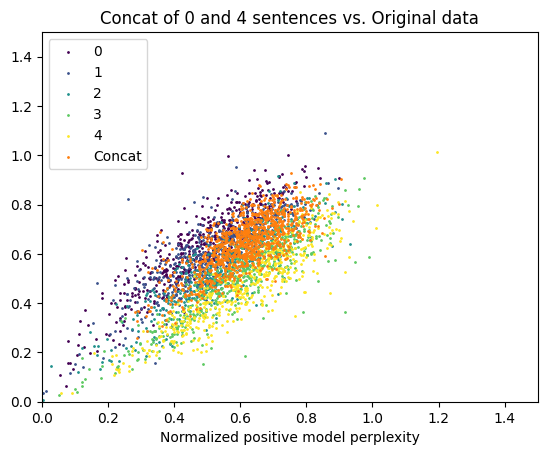

In [7]:
_df = df.sample(1000)
cmap = plt.get_cmap('viridis', 5)
for label in range(5):
    _df = df[(df.label == label) & (df["split"] == "test")].sample(500)
    plt.scatter(np.exp(_df.neg - _df.ori), np.exp(_df.pos - _df.ori), c=cmap(label), label=label, s=1)

_df = df_aug[df_aug["split"] == "concat"]
plt.scatter(np.exp(_df.neg - _df.ori), np.exp(_df.pos - _df.ori), c="C1", label="Concat", s=1)

plt.xlim(0, 1.5)
plt.ylim(0, 1.5)
plt.xlabel("Normalized negative model perplexity")
plt.xlabel("Normalized positive model perplexity")
plt.title("Concat of 0 and 4 sentences vs. Original data")
plt.legend()

/tmp/ipykernel_3909990/3230652445.py:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.exp(_df.neg - _df.ori), np.exp(_df.pos - _df.ori), c=cmap(label), label=label, s=1)


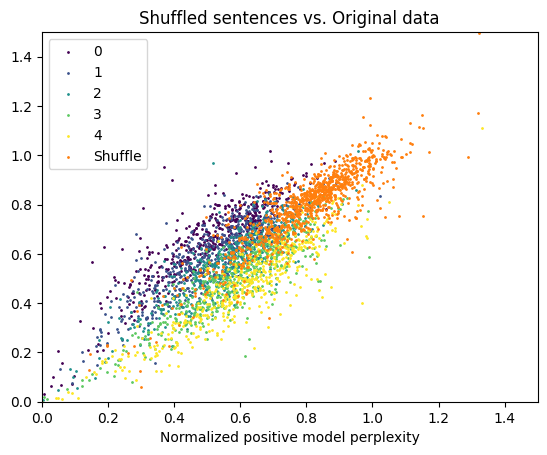

In [8]:
_df = df.sample(1000)
cmap = plt.get_cmap('viridis', 5)
for label in range(5):
    _df = df[(df.label == label) & (df["split"] == "test")].sample(500)
    plt.scatter(np.exp(_df.neg - _df.ori), np.exp(_df.pos - _df.ori), c=cmap(label), label=label, s=1)

_df = df_aug[df_aug["split"] == "shuffle"]
plt.scatter(np.exp(_df.neg - _df.ori), np.exp(_df.pos - _df.ori), c="C1", label="Shuffle", s=1)

plt.xlim(0, 1.5)
plt.ylim(0, 1.5)
plt.xlabel("Normalized negative model perplexity")
plt.xlabel("Normalized positive model perplexity")
plt.title("Shuffled sentences vs. Original data")
plt.legend()

Train accuracy 0.52546
Test accuracy 0.49858


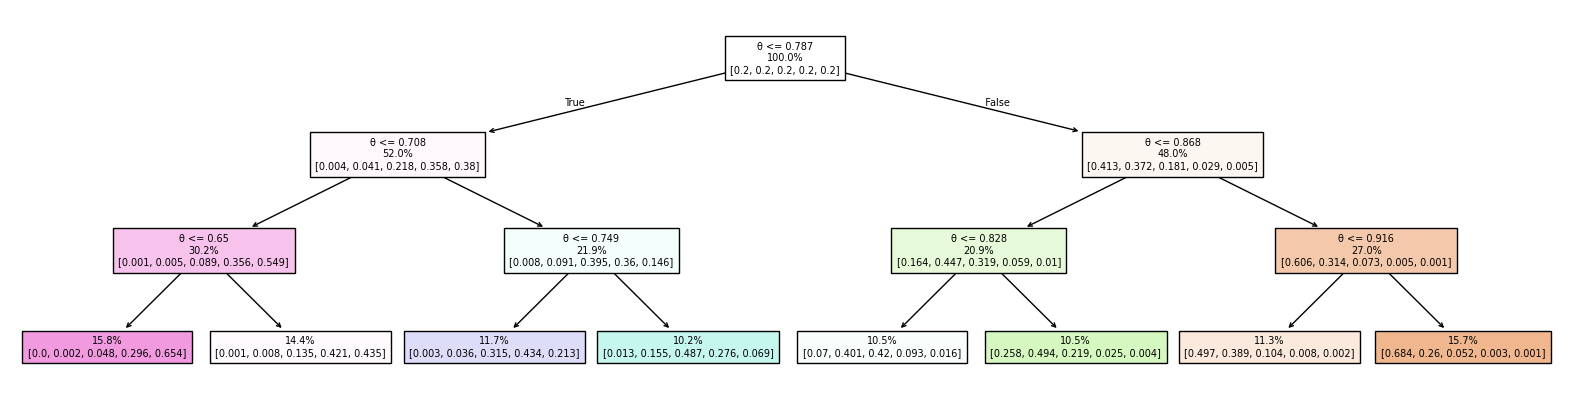

In [11]:
from sklearn import tree

df_train = df[df["split"] == "train"]
df_test = df[df["split"] == "test"]

def _get_polar(df):
    pos = np.exp(df.pos - df.ori)
    neg = np.exp(df.neg - df.ori)
    r = np.sqrt((pos ** 2 + neg ** 2))
    theta = np.arctan(pos / neg)
    return np.stack([r, theta]).T

X_train = _get_polar(df_train)
X_test = _get_polar(df_test)

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, df_train.label)
print("Train accuracy", clf.score(X_train, df_train.label))
print("Test accuracy", clf.score(X_test, df_test.label))

plt.figure(figsize=(20, 5))
tree.plot_tree(clf, fontsize=7, impurity=False, proportion=True, filled=True, label="none", feature_names=["r", "θ"])
plt.show()